In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
def correct_columns(dataframe, filename):
    df = pd.DataFrame()
    df["Time"] = dataframe["Timestamp"].copy()
    df["Zone"] = dataframe["AvailabilityZone"].copy()
    df["Instance Type"] = dataframe["InstanceType"].copy()
    df["Product Description"] = dataframe["ProductDescription"].copy()
    df["Price"] = dataframe["SpotPrice"].copy()
    df.to_csv(f"{filename}_cols_corrected.csv")
    return df

In [4]:
def process_zones(df):
    
    zones = df['Zone'].unique()
    print(f"There are {len(zones)} unique zone(s). They are {zones}")
    
    stable_zones_num = 0
    stable_zones = []
    unstable_zones = []
    for zone in zones:
        temp_df = df[df['Zone'] == zone]
        price_set = set(temp_df["Price"])
        if len(price_set) == 1:
            stable_zones_num += 1
            stable_zones.append([zone, len(price_set), price_set])
        else:
            unstable_zones.append([zone, len(price_set), price_set])

    print(f"There are {len(stable_zones)} zones with stable prices. They are {stable_zones}")
    
    print(f"There are {len(unstable_zones)} zones with unstable prices")
    print("zonename   no.of. unique prices")
    for zone in unstable_zones:
        print(zone[0], zone[1])
    
    return zones, stable_zones, unstable_zones

In [5]:
def datetime_sort(df):
    first_cell = df.iloc[0]['Time']
    date = datetime.datetime.strptime(first_cell, '%Y-%m-%d %H:%M:%S%z')
    print(f"The datetime format is %Y-%m-%d %H:%M:%S%z, example: {date}")
    df['Time'] = pd.to_datetime(df['Time'])
    df = df.sort_values(by=['Time'])

    return df

In [6]:
def plot(dataframe, filenamem, zone):
    df = dataframe.drop(['Zone', 'Instance Type', 'Product Description'], axis=1)
    df = df.sort_values(by=['Time'])
    df.plot(x='Time')
    plt.savefig(f"{filename[:-4]}_{zone}.pdf")
    df.to_csv(f"{filename[:-4]}_{zone}.csv")
    return df

In [8]:
def clean_dataset(filename):
    df0 = pd.read_csv(filename)
    
#     df1 = correct_columns(df0, filename)
    df1 = df0.copy()
    
    zones, stable_zones, unstable_zones = process_zones(df1)
    
    for unstable_zone in unstable_zones:
        zone = unstable_zone[0]
        
        df2 = df1[df1['Zone'] == zone]
        
        
        df3 = datetime_sort(df2).copy()
    
        df4 = plot(df3, filename, zone)
 

There are 30 unique zone(s). They are ['ap-south-1b' 'ap-south-1a' 'eu-west-1c' 'eu-west-1a' 'eu-west-1b'
 'ap-northeast-2c' 'ap-northeast-2a' 'ap-northeast-1c' 'ap-northeast-1a'
 'sa-east-1a' 'sa-east-1c' 'ap-southeast-1a' 'ap-southeast-1b'
 'ap-southeast-2b' 'ap-southeast-2a' 'ap-southeast-2c' 'eu-central-1b'
 'eu-central-1a' 'us-east-1e' 'us-east-1b' 'us-east-1c' 'us-east-1d'
 'us-east-2a' 'us-east-2c' 'us-east-2b' 'us-west-1a' 'us-west-1c'
 'us-west-2b' 'us-west-2c' 'us-west-2a']
There are 2 zones with stable prices. They are [['eu-west-1b', 1, {0.1371}], ['ap-northeast-2c', 1, {0.1196}]]
There are 28 zones with unstable prices
zonename   no.of. unique prices
ap-south-1b 109
ap-south-1a 100
eu-west-1c 88
eu-west-1a 171
ap-northeast-2a 10
ap-northeast-1c 59
ap-northeast-1a 26
sa-east-1a 33
sa-east-1c 119
ap-southeast-1a 177
ap-southeast-1b 176
ap-southeast-2b 173
ap-southeast-2a 183
ap-southeast-2c 183
eu-central-1b 197
eu-central-1a 164
us-east-1e 25
us-east-1b 157
us-east-1c 125
u

/Users/tej/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


The datetime format is %Y-%m-%d %H:%M:%S%z, example: 2021-06-27 11:51:25+00:00
The datetime format is %Y-%m-%d %H:%M:%S%z, example: 2021-06-27 13:02:40+00:00
The datetime format is %Y-%m-%d %H:%M:%S%z, example: 2021-06-27 10:04:53+00:00
The datetime format is %Y-%m-%d %H:%M:%S%z, example: 2021-06-27 04:23:41+00:00


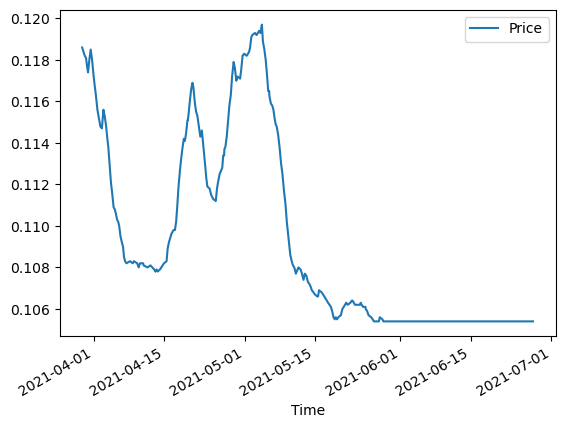

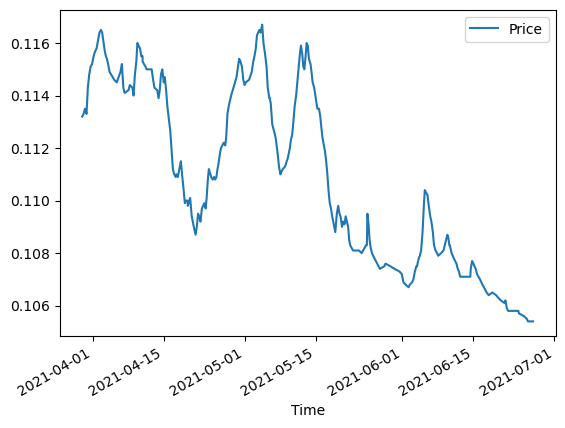

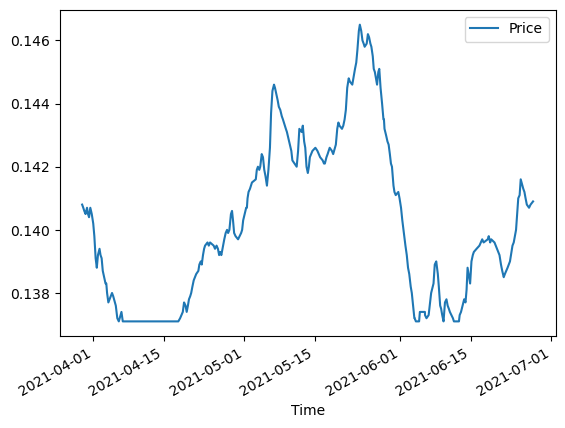

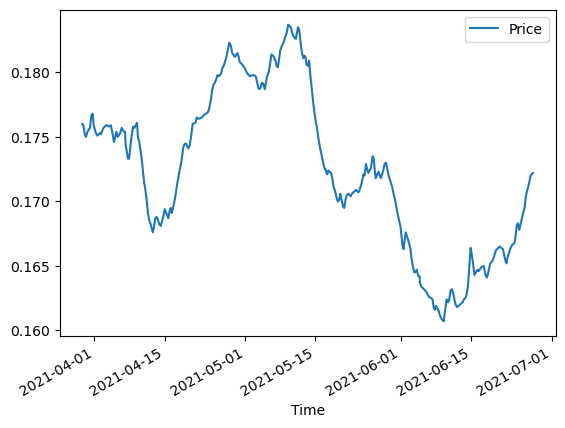

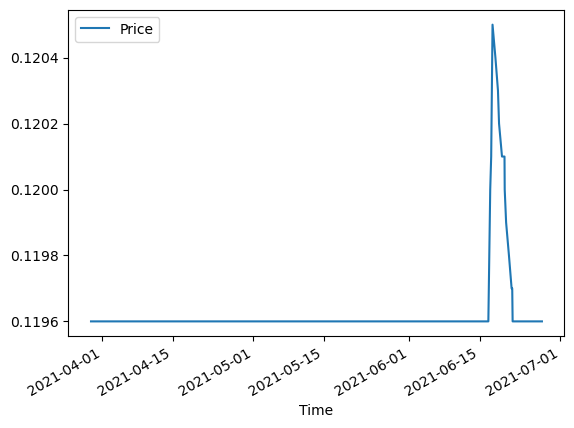

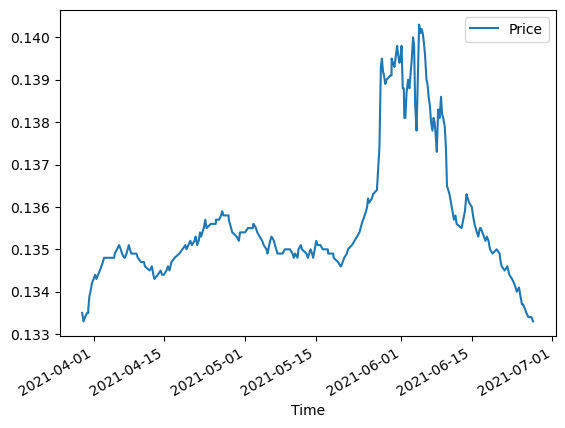

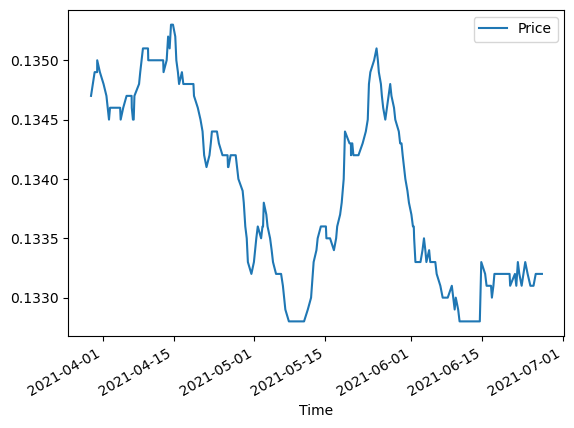

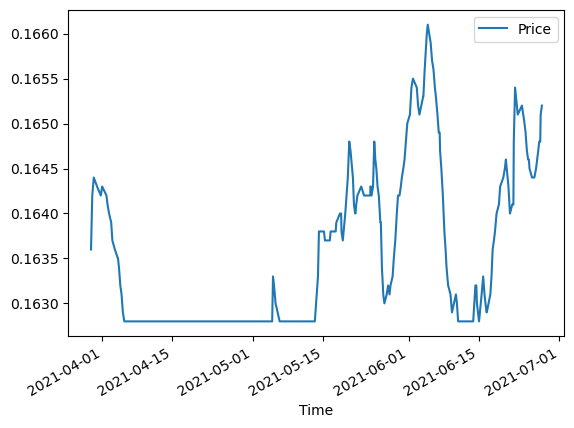

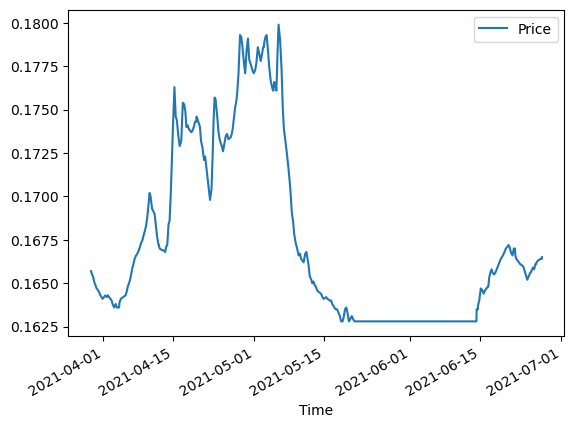

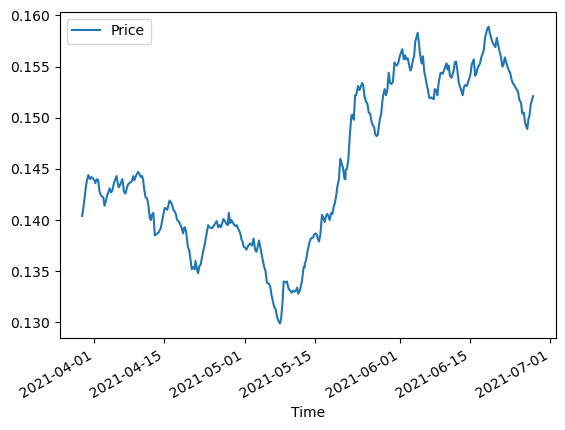

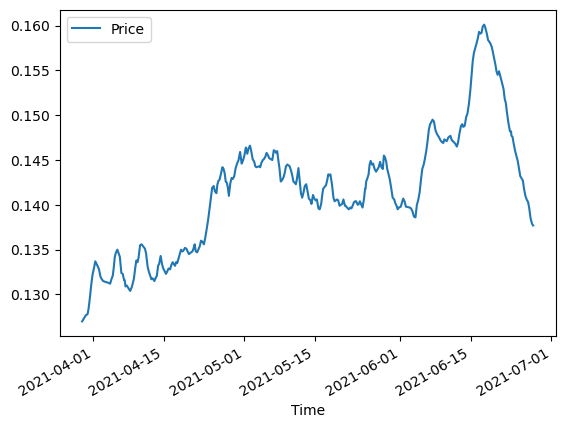

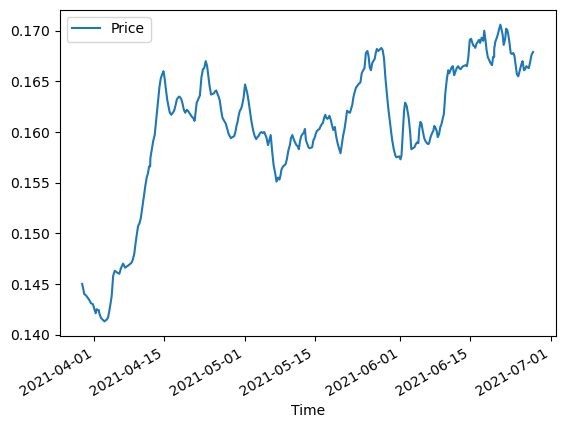

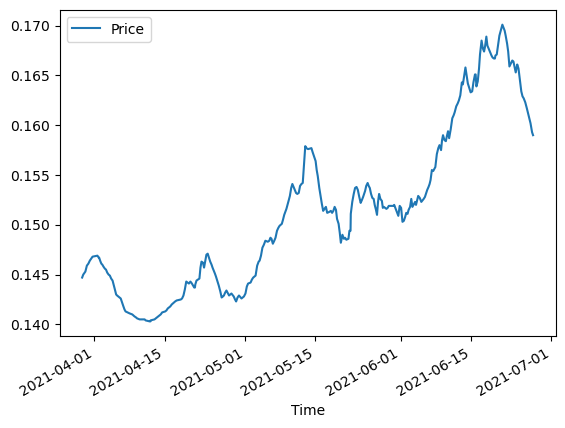

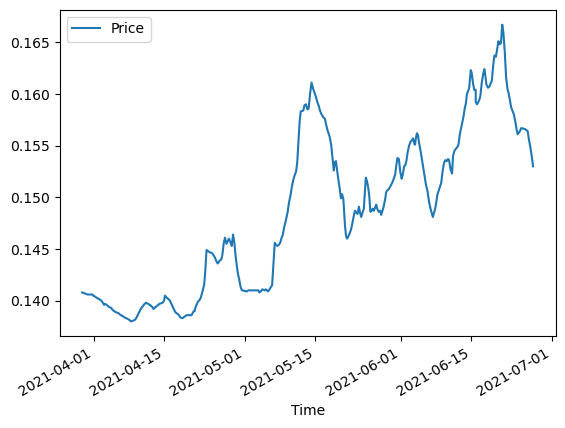

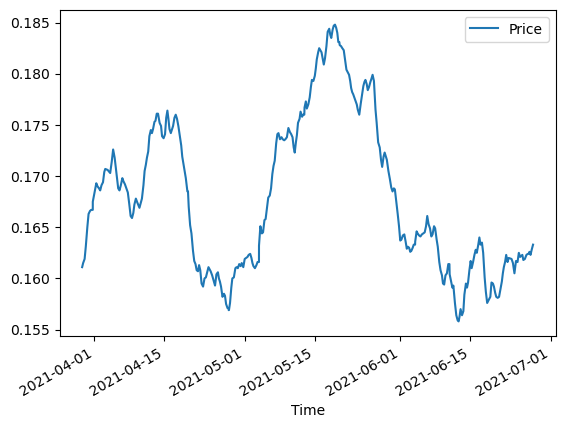

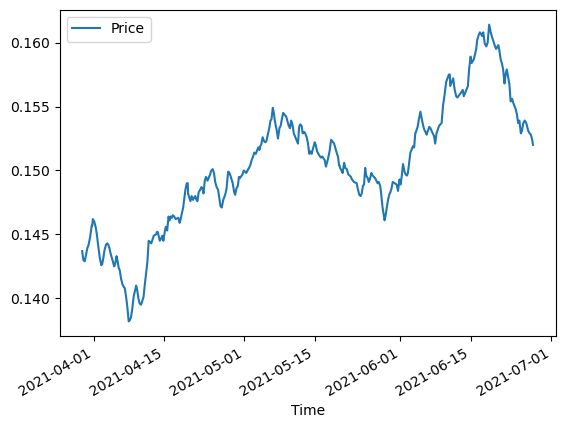

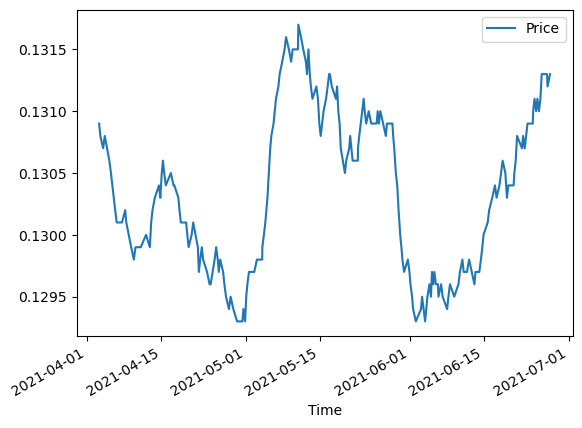

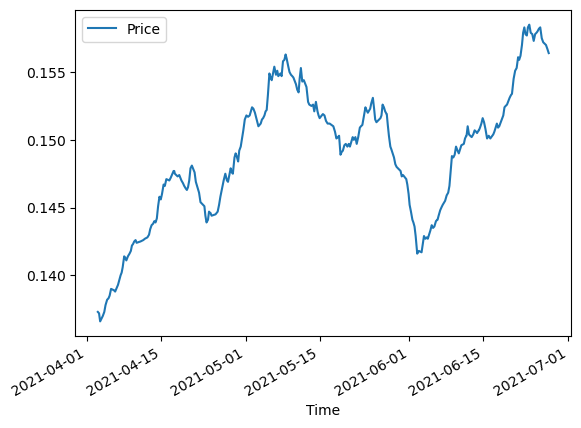

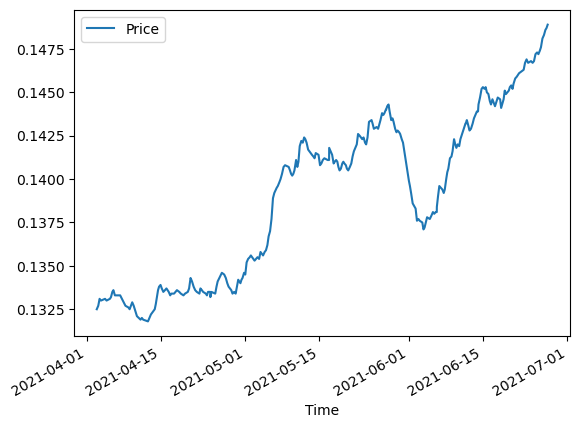

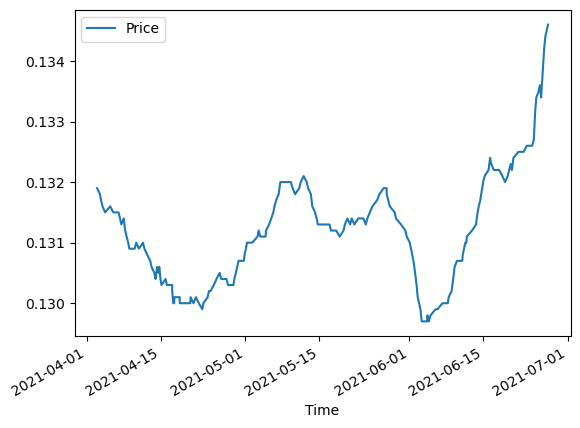

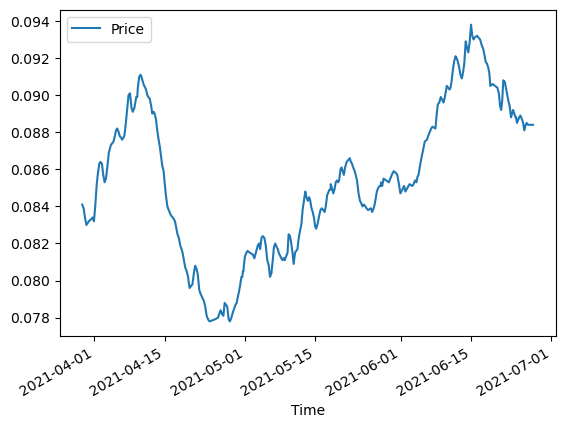

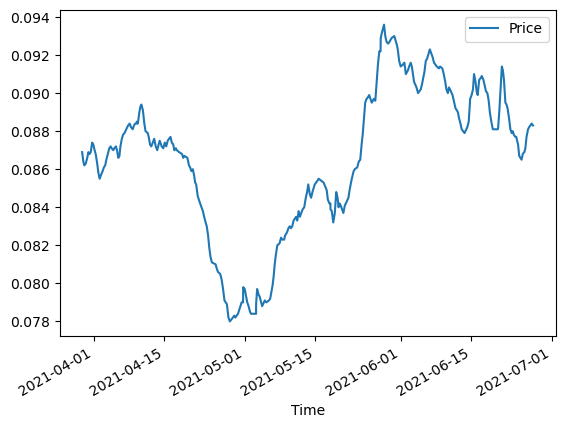

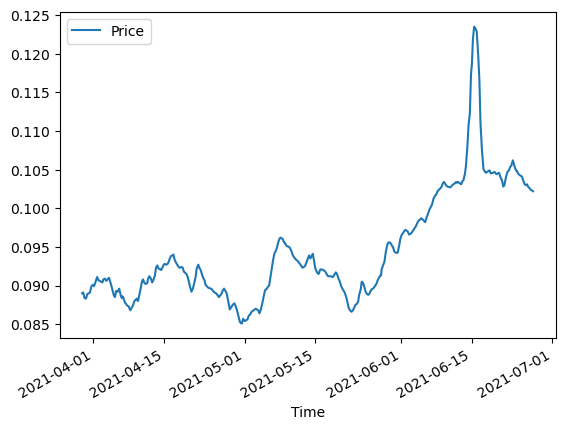

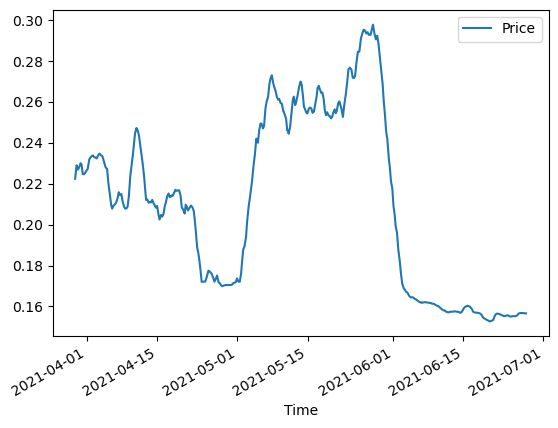

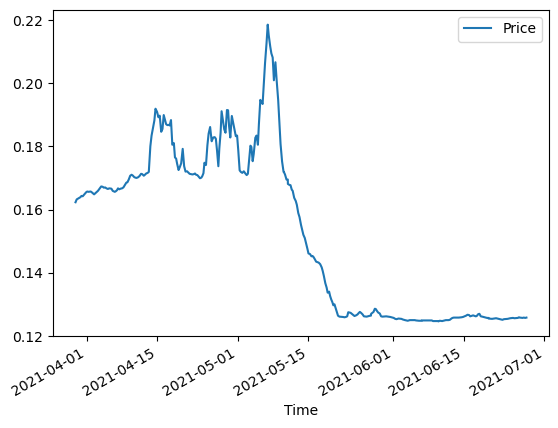

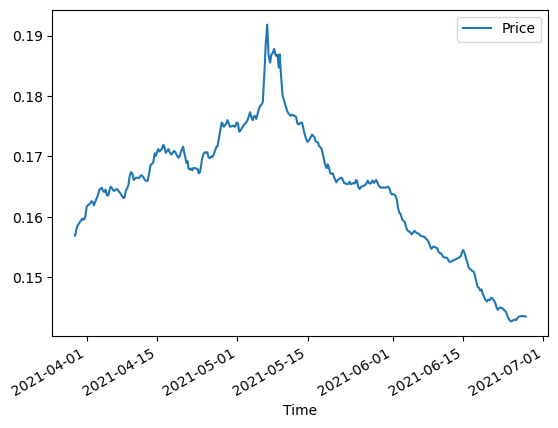

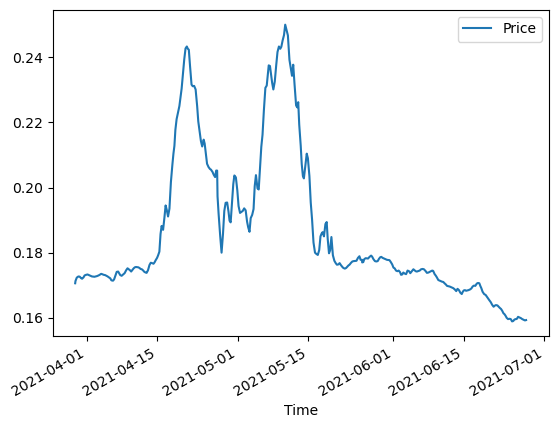

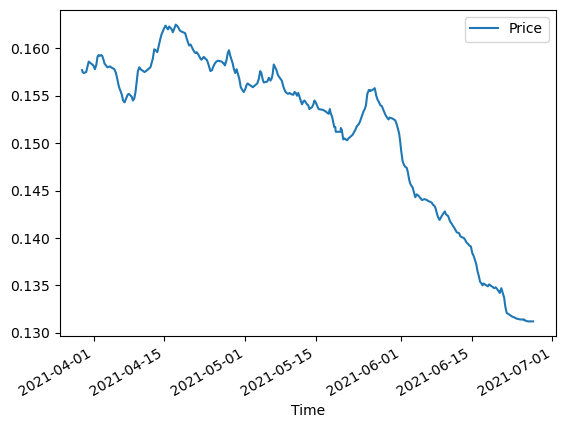

In [13]:
filename = 'dataset_r3_2xlarge.csv'
clean_dataset(filename)